In [2]:
import numpy as np
class Perceptron(object):
    """パーセプトロンの分類器
    パラメータ
    ---------------
    eta : float
            学習率(0.0より大きく1.0以下の値)
    n_iter : int
            トレーニングデータのトレーニング回数
    random_state : int
            重みを初期化するためのシード
            
    属性
    ---------------
    w_ : 1次元配列
            適合後の重み
    errors_ : リスト
            各エポックでの誤分類(更新)の数
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        トレーニングデータに適合させる
        パラメータ
        -------------
        X : {配列のような構造}, shape = [n_samples, features]
            トレーニングデータ
            n_samples : トレーニングデータの個数, features : 特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        -------------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = list()
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                # 重みの更新が0出ない場合は誤分類としてカウント
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
# 説明変数
# 次元削減
X = df.iloc[0:100, [0, 2]].values

In [11]:
import matplotlib.pyplot as plt

# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta = 0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)

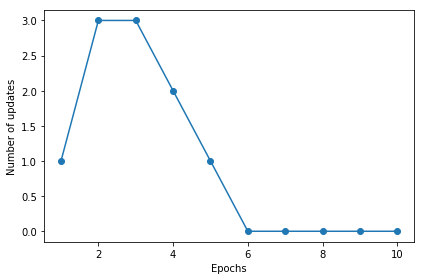

In [12]:
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()